In [2]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Plotly in colab
import plotly.io as pio
pio.renderers.default = "colab"

import warnings 
warnings.filterwarnings('ignore')

C:\Users\DkySuarez\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DkySuarez\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


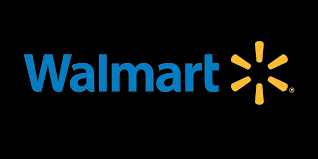

In [3]:
from IPython import display
display.Image('images123456.png')

<h1>The goal of this project is to predict sales and demand accurately for Walmart. To achieve this, we will follow these steps:</h1>

1. **Understanding the dataset:**
   - Examine the available features, such as weekly sales, whether the week is a holiday or not, temperature, fuel price, consumer price index (CPI), and unemployment rate.
   - Check for missing values or inconsistent data that need to be cleaned.

2. **Exploratory Data Analysis (EDA):**
   - Visualize the distributions of variables and look for relationships between them.
   - Identify patterns, trends, and potential outliers.

3. **Data preparation:**
   - Encode the "IsHoliday" variable (1 for holiday weeks and 0 for non-holiday weeks).
   - Consider normalizing or standardizing numerical features if necessary.

4. **Regression modeling:**
   - Build regression models to predict weekly sales.
   - You can start with a simple linear regression model using a single feature (e.g., temperature) and then progress to more complex models.

5. **Model evaluation:**
   - Use metrics like R2 (coefficient of determination) and RMSE (root mean square error) to evaluate model performance.
   - Compare results from different models to select the best one.

<h3>Here are the steps for project execution and planning:</h3>

1. **Define the project scope and objectives.**
2. **Plan resource management.**
3. **Organize task management.**
4. **Coordinate tasks and resources.**
5. **Schedule time management and improve predictability.**
6. **Evaluate and enhance the project.**


In [4]:
pd.options.display.max_columns=100 # to see columns 

# <center> Loading Dataset

In [5]:
df_store = pd.read_csv('F:/Data/stores.csv') #store data
df_train = pd.read_csv('F:/Data/train.csv/train.csv') # train set
features = pd.read_csv("F:/Data/features.csv/features.csv") #feature data
sample = pd.read_csv("F:/Data/sampleSubmission.csv/sampleSubmission.csv") #sample data
test = pd.read_csv("F:/Data/test.csv/test.csv") #test data

# <center> Data Exploration (EDA)

<h3>Show the first rows of the dataframe</h3>

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


<p>
    
1. **Store**: This column represents the store identifier or number. Each store has a unique value in this column.
2. **Type**: The "Type" column indicates the type of store.
3. **Size**: The "Size" column generally refers to the physical size of the store.
    
</p>

In [7]:
print(f"Number of records: {len(features)}")
print(f"Number of columns: {len(features.columns)}")

Number of records: 8190
Number of columns: 12


In [8]:
# Check for null values
print(df_store.isnull().sum())

Store    0
Type     0
Size     0
dtype: int64


In [9]:
print(df_store.describe())

# Data types of the columns
print(df_store.dtypes)

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
Store     int64
Type     object
Size      int64
dtype: object


In [10]:
df_store['Type'].nunique() # number of distinct categories present in that column

3


<h3>
The distribution of stores (represented on the x-axis) by type. Each type of store is depicted with stacked bars, allowing for a visual comparison of the quantity of each type at each location
</h3>

<AxesSubplot:xlabel='Store', ylabel='Count'>

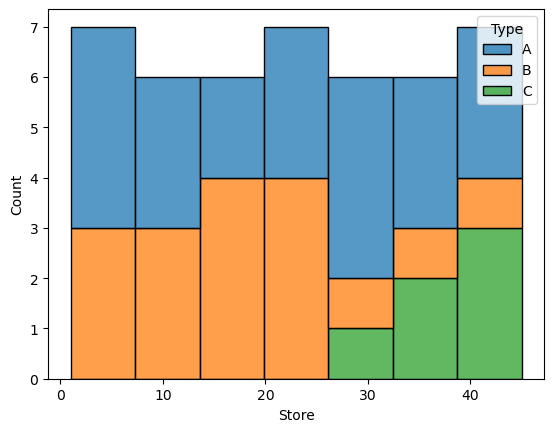

In [11]:
sns.histplot(data=df_store, x="Store", hue="Type", multiple="stack")

<p>

This chart shows a clustered bar chart with three types of bars labeled as Type A (blue), Type B (orange), and Type C (green). The x-axis is labeled "Store" with numerical values of 0, 10, 20, 30, and 40. The y-axis is labeled "count" with numerical values from 1 to 7. Each cluster on the x-axis represents a store, and each bar within a cluster represents the count of each type for that particular store. This chart is interesting or relevant as it visually compares the counts of three different types across various stores, which can be useful for analyzing patterns or trends in data distribution among the stores.
</p>

In [12]:
numeric_columns    = df_store[['Store', 'Size']] #This means that the columns containing numerical data are selected.
correlation_matrix = numeric_columns.corr() #The correlation matrix between the ‘Store’ and ‘Size’ columns is calculated.

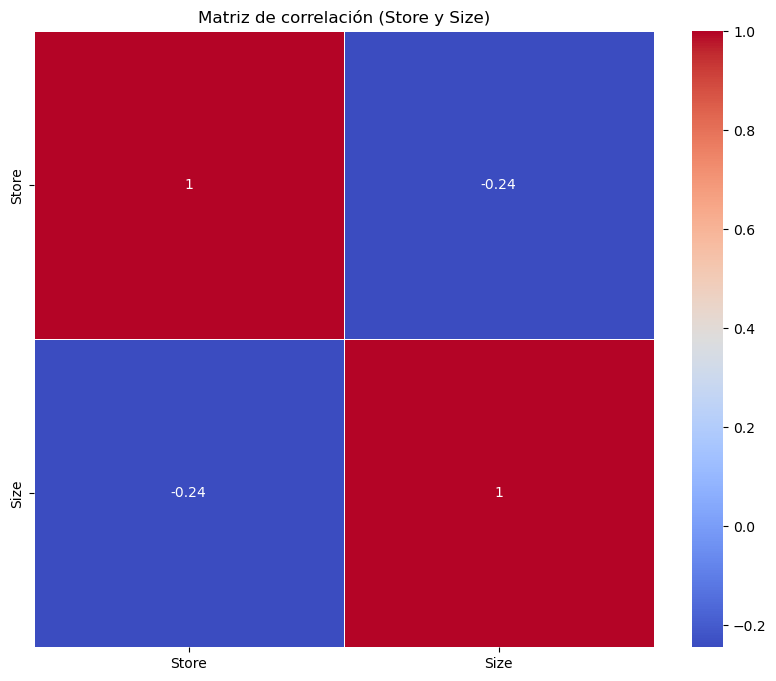

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Store y Size)')
plt.show()

<p>

The image displays a correlation matrix with two variables: "Store" and "Size." The matrix is color-coded, with a scale on the right side ranging from -1 to 1, indicating the strength and direction of the correlation. The diagonal elements, which compare each variable to itself, are colored in red and have a correlation coefficient of 1, signifying a perfect positive correlation. The off-diagonal elements show the relationship between "Store" and "Size," both marked with -0.24, suggesting a weak negative correlation between these two variables. This type of matrix is relevant for identifying how strongly different variables are related in data analysis.  

</p>

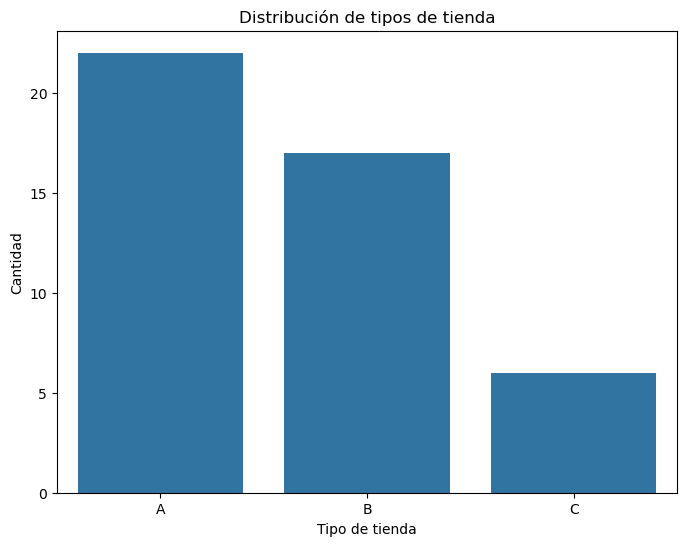

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_store, x='Type')
plt.xlabel('Type of store.')
plt.ylabel(' Quantity')
plt.title('Distribution of store types')
plt.show()     

<p>
    
- Type A: The tallest bar, with a value close to 20, represents the quantity of stores of this type.
- Type B: The middle bar, with an approximate value of 15, shows the quantity of stores of this second type.
- Type C: The shortest bar, with a value close to 5, represents the quantity of stores of this third type.

This chart is relevant for business analysis or market studies, as it provides a clear visual comparison between the quantities of different types of stores.

</p>

In [15]:
features.head() #Show the first rows of the dataframe

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


<p>
    

- **Store**: This column represents the identifier or store number for Walmart. Each store would have a unique value in this column.
- **Date**: The "Date" column indicates the date to which the data entry refers. It can be useful for analyzing trends over time.
- **Temperature**: The "Temperature" column represents the temperature at the store's location. It can impact sales, as purchasing behavior may vary based on the weather.
- **Fuel_Price**: The "Fuel_Price" column refers to the fuel price in the region. This can also influence customer buying behavior.
- **MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5**: These columns likely represent specific discounts or promotions applied in the store. The values in these columns indicate the amount of the discounts.
- **CPI (Consumer Price Index)**: The Consumer Price Index is a measure of inflation. It can affect consumers' purchasing power and, consequently, sales.
- **Unemployment**: The "Unemployment" column represents the unemployment rate in the region. This can also impact consumer spending.
- **IsHoliday**: The "IsHoliday" column is a binary value indicating whether the day corresponds to a holiday or not. It can affect sales due to changes in buying behavior during holidays¹.

</p>

In [16]:
print(f"Number of records: {len(features)}")
print(f"Number of columns: {len(features.columns)}")

Número de registros: 8190
Número de columnas: 12


In [17]:
features.describe() #generate descriptive statistics

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000




<p>
    Count: The number of non-empty values in each column.
    Mean: The average value for each numeric column.
    Standard Deviation (std): A measure of how much the values deviate from the mean.
    Minimum (min): The smallest value in each column.
    25th Percentile (25%): The value below which 25% of the data falls.
    50th Percentile (50%): Also known as the median, it represents the middle value.
    75th Percentile (75%): The value below which 75% of the data falls.
    Maximum (max): The largest value in each column.
</p>

In [18]:
features.dtypes # Data types of the columns

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [19]:
print("Column information:")
print(f"Number of unique stores: {features['Store'].nunique()}")
print(f"Date range: {features['Date'].min()} to {features['Date'].max()}")
print(f"Average temperature: {features['Temperature'].mean():.2f}°C")
print(f"Average fuel price: {features['Fuel_Price'].mean():.2f}")
print(f"Average MarkDown1 discount: {features['MarkDown1'].mean():.2f}")


Column information:
Number of unique stores: 45
Date range: 2010-02-05 to 2013-07-26
Average temperature: 59.36°C
Average fuel price: 3.41
Average MarkDown1 discount: 7032.37


In [20]:
features.isnull().sum() #missing values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [21]:
df_train.head() #Show the first rows of the dataframe

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [22]:
feature_store = features.merge(df_store, how="inner", on = "Store").copy()

<p>
    
 The code feature_store = features.merge(df_store, how="inner", on="Store").copy() is performing a merge operation between two DataFrames: features and df_store.
 The code creates a new DataFrame called feature_store by combining features from features with store information from df_store, using the “Store” column as the merge key.
        
</p>

In [23]:
feature_store.head() #Show the first rows of the dataframe

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [24]:
train_df = df_train.merge(feature_store, how="inner", on=['Store', 'Date', 'IsHoliday'])\
    .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True).copy()

<p>


 The code train_df = df_train.merge(feature_store, how="inner", on=['Store', 'Date', 'IsHoliday']) performs a merge operation between two DataFrames: df_train and feature_store.
        the code creates a new DataFrame called train_df that combines training data from df_train with store features from feature_store, using the mentioned columns as merge keys. 
</p>

In [25]:
train_df.head() #Show the first rows of the dataframe

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [26]:
train_df.describe() #generate descriptive statistics

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [27]:
train_df.dtypes  # Data types of the columns

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [28]:
#These lines of code convert the date columns in the mentioned DataFrames 
#into datetime objects 
#for easier date analysis and manipulation. 
feature_store['Date'] = pd.to_datetime(feature_store['Date'])
df_train['Date']      = pd.to_datetime(df_train['Date'])
test['Date']          = pd.to_datetime(test['Date'])

In [29]:
df_train.head() #Show the first rows of the dataframe

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [30]:
df_train.dtypes # Data types of the columns

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [31]:
#These lines of code enrich the feature_store DataFrame with information about the day, 
#week, month, and year of the dates present in the “Date” column.
feature_store['Day']   = feature_store['Date'].dt.isocalendar().day
feature_store['Week']  = feature_store['Date'].dt.isocalendar().week
feature_store['Month'] = feature_store['Date'].dt.month
feature_store['Year']  = feature_store['Date'].dt.isocalendar().year

In [32]:
#these lines of code combine the df_train and feature_store DataFrames through an inner join, 
#sort the result, and create independent copies for the training and test datasets.
train_df = df_train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday'])\
    .sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday'])\
    .sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()

In [33]:
#df_weeks will contain the sum of the numeric columns for each week in the original 
#train_df DataFrame.
df_weeks = train_df.groupby('Week').sum(numeric_only=True)

In [34]:
df_weeks.head()  #Show the first rows of the dataframe

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Day,Month,Year
Week,,,,,,,,,,,,,,,,,
1,130899,260501,8.773121e+07,0,222343.25,18872.529,1.499397e+07,67007392.71,353486.72,3078155.61,15506769.87,1.008962e+06,46396.361,806775433,29515,5903,11873906
2,131036,260045,8.269676e+07,0,204005.74,19098.337,1.019858e+07,29235314.34,218513.27,1565390.83,11416226.10,1.007821e+06,46330.934,805424262,29470,5894,11855800
3,130031,259381,8.273564e+07,0,222547.92,19167.202,7.210967e+06,9824350.22,214079.04,1942054.54,8410008.53,1.006852e+06,46151.605,804330161,29385,5877,11821606
4,129971,259111,7.943483e+07,0,221326.56,19229.283,4.418107e+06,5170160.65,213215.80,296603.35,7927497.89,1.006330e+06,46135.250,803454747,29355,5871,11809533
5,195904,392036,1.419895e+08,0,317172.19,27489.729,1.140734e+08,8936033.33,448553.25,90821661.61,18580144.27,1.507341e+06,71739.976,1213767653,44290,17716,17813460


In [35]:
df_weeks.describe() #generate descriptive statistics

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Day,Month,Year
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.0,52.000000,52.0
mean,179982.384615,358823.500000,1.295619e+08,570.403846,487157.039615,27248.229865,2.099804e+07,7.134053e+06,3.794841e+06,8.781078e+06,1.348029e+07,1.387954e+06,64534.978942,1.108469e+09,40535.576923,52286.923077,16303154.403846
std,28408.882898,56519.036141,2.024704e+07,2036.838162,173557.388664,4946.779238,1.778964e+07,2.025578e+07,2.380470e+07,1.392573e+07,7.812268e+06,2.195971e+05,9989.870349,1.745567e+08,6378.238405,24659.146777,2565822.290218
min,129971.000000,258792.000000,7.943483e+07,0.000000,204005.740000,18698.409000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.002878e+06,46135.250000,8.034547e+08,29355.0,5871.000000,11809533.0
25%,179200.750000,358111.500000,1.303218e+08,0.000000,305491.745000,25424.617500,1.222017e+07,1.005049e+05,4.860246e+04,2.136837e+06,9.285461e+06,1.382761e+06,63231.356000,1.103292e+09,40362.5,34598.750000,16233070.5
50%,195907.000000,390099.000000,1.372442e+08,0.000000,523740.940000,29820.116500,1.616030e+07,3.458702e+05,1.393126e+05,4.936606e+06,1.142720e+07,1.508916e+06,69690.289500,1.205473e+09,44047.5,59958.500000,17715957.5
75%,196620.250000,391477.250000,1.410408e+08,0.000000,646112.487500,30286.293500,2.482717e+07,2.706568e+06,2.369165e+05,8.696584e+06,1.719032e+07,1.516729e+06,70736.792500,1.210853e+09,44293.75,71325.000000,17814965.75
max,197602.000000,396508.000000,1.579297e+08,8895.000000,706420.440000,31981.274000,1.140734e+08,1.255532e+08,1.717897e+08,9.082166e+07,5.593772e+07,1.528052e+06,72321.353000,1.221309e+09,44645.0,88700.000000,17956249.0


In [36]:
df_weeks[["Weekly_Sales", "Temperature"]].describe()

,Weekly_Sales,Temperature
count,5.200000e+01,52.000000
mean,1.295619e+08,487157.039615
std,2.024704e+07,173557.388664
min,7.943483e+07,204005.740000
25%,1.303218e+08,305491.745000
50%,1.372442e+08,523740.940000
75%,1.410408e+08,646112.487500
max,1.579297e+08,706420.440000


<p>

- **Mean (average):** Represents the average value of weekly sales and temperature.
- **Standard deviation:** Measures the dispersion or variability of the data around the mean.
- **Minimum and maximum values:** Indicate the lowest and highest values in each column.
- **Quartiles:** Divide the data into four equal parts: the first quartile (Q1) is the 25% of the data, the median (Q2) is the 50%, and the third quartile (Q3) is the 75%.


</p>

In [37]:
#To calculate the average of sales for holidays and non-holidays separately, 
#you can use the following code: df_weeks.groupby("IsHoliday")["Weekly_Sales"].mean(). 
df_weeks.groupby("IsHoliday")["Weekly_Sales"].mean() 

IsHoliday
0       1.298317e+08
5946    8.647498e+07
5959    1.324146e+08
8861    1.407277e+08
8895    1.456823e+08
Name: Weekly_Sales, dtype: float64

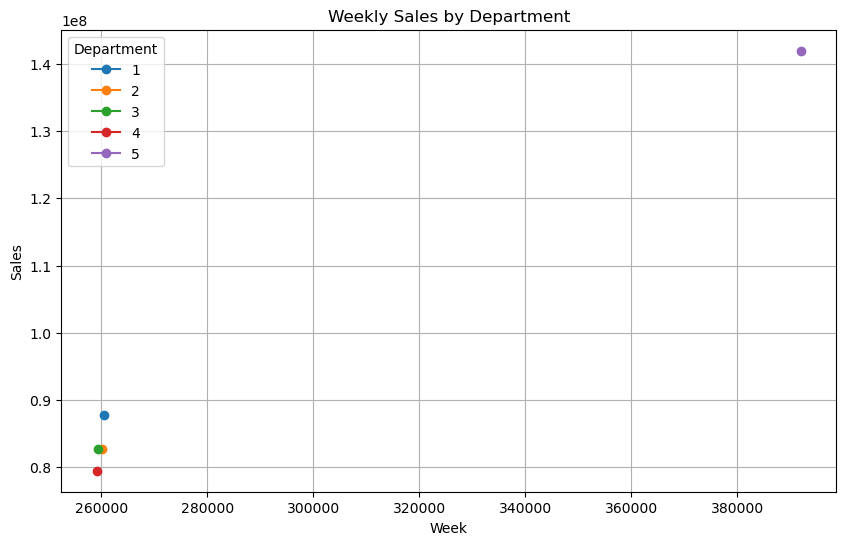

In [38]:
#The provided code generates a chart displaying the weekly sales evolution per department over time.
sales_by_dept = df_weeks.groupby(['Dept', 'Week'])['Weekly_Sales'].sum().unstack()

# Plot sales for some departments (e.g., the first 5)
sales_by_dept.iloc[:, :5].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Weekly Sales by Department')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Department')
plt.show()


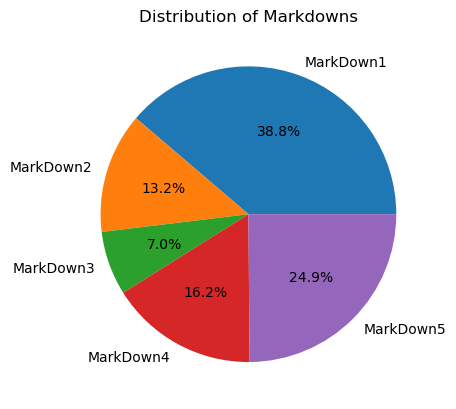

In [39]:
# Sum of markdowns
markdown_totals = df_weeks[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum()

# Create a pie chart
plt.pie(markdown_totals, labels=markdown_totals.index, autopct='%1.1f%%')
plt.title('Distribution of Markdowns')
plt.show()



In [40]:
# Weekly Sales per Year with Week

weekly_sales_by_week = train_df.groupby(by=["Year", "Week"], as_index=False).agg({"Weekly_Sales" : ["mean", "median"]}).copy()
weekly_sales_by_week_2010 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2010].copy()
weekly_sales_by_week_2011 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2011].copy()
weekly_sales_by_week_2012 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2012].copy()

weekly_sales_by_week_2010 = weekly_sales_by_week_2010.reset_index(drop=True)
weekly_sales_by_week_2011 = weekly_sales_by_week_2011.reset_index(drop=True)
weekly_sales_by_week_2012 = weekly_sales_by_week_2012.reset_index(drop=True)

weekly_sales_by_week = pd.concat([weekly_sales_by_week_2010, weekly_sales_by_week_2011, weekly_sales_by_week_2012], axis=1)
weekly_sales_by_week.head()

Year Week  Weekly_Sales            Year Week  Weekly_Sales            Year  \
                      mean    median                     mean    median         
0  2010    5  16836.121997  7904.690  2011    1  14599.244973  6384.990  2012   
1  2010    6  16352.056032  8365.095  2011    2  13891.283484  5961.710  2012   
2  2010    7  16216.658979  8411.250  2011    3  13932.367385  6139.315  2012   
3  2010    8  14899.549688  7235.800  2011    4  13566.239462  6227.980  2012   
4  2010    9  15921.015727  7717.975  2011    5  15773.448776  7312.115  2012   

  Week  Weekly_Sales           
                mean   median  
0    1  15121.231736  6586.37  
1    2  14168.266514  5914.86  
2    3  14221.357405  6146.31  
3    4  13494.232612  5785.84  
4    5  15480.553608  6859.65

In [41]:
# Weekly Sales per Year

weekly_sales_by_year = train_df.groupby(by=["Year"], as_index=False).agg({"Weekly_Sales" : ["mean", "median"]}).copy()

weekly_sales_by_year_2010 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2010].copy()
weekly_sales_by_year_2011 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2011].copy()
weekly_sales_by_year_2012 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2012].copy()

weekly_sales_by_year_2010 = weekly_sales_by_year_2010.reset_index(drop=True)
weekly_sales_by_year_2011 = weekly_sales_by_year_2011.reset_index(drop=True)
weekly_sales_by_year_2012 = weekly_sales_by_year_2012.reset_index(drop=True)

weekly_sales_by_year = pd.concat([weekly_sales_by_year_2010, weekly_sales_by_year_2011, weekly_sales_by_year_2012], axis=0)
weekly_sales_by_year.head()

Year  Weekly_Sales          
                 mean    median
0  2010  16270.275737  7964.300
0  2011  15954.070675  7522.020
0  2012  15694.948597  7365.095

In [42]:
#These lines of code calculate the average weekly sales for each month.
monthly_sales_by_month = train_df.groupby(by=["Month"], as_index=False)["Weekly_Sales"].mean()
print(monthly_sales_by_month.head())

   Month  Weekly_Sales
0      1  14126.075111
1      2  16008.779217
2      3  15416.657597
3      4  15650.338357
4      5  15776.337202


<AxesSubplot:>

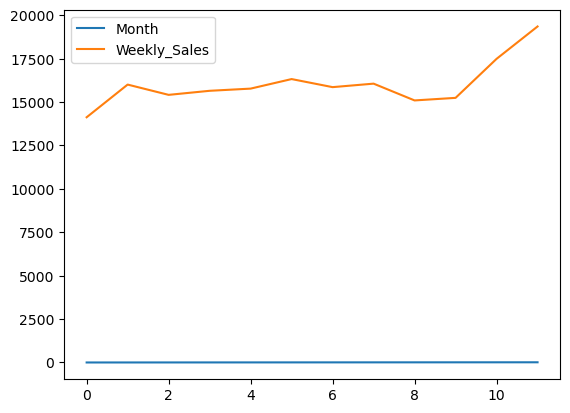

In [43]:
#Generates a line plot showing the average weekly sales for each month. 
#It breaks off at December and plots a new line for each separate year.
monthly_sales_by_month.plot()

<AxesSubplot:>

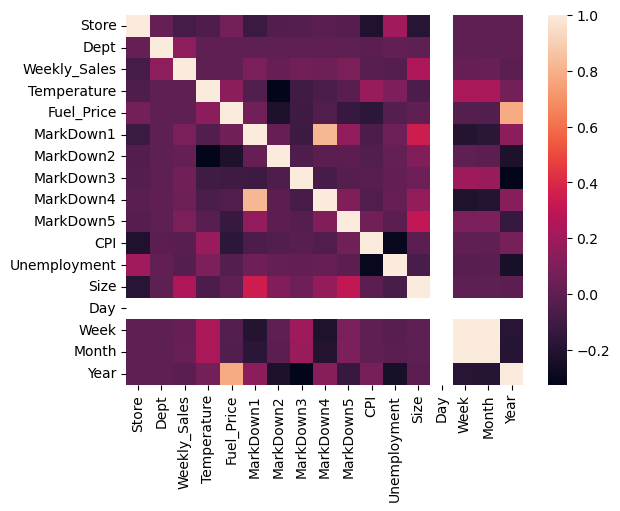

In [44]:
train_df_numeric = train_df.select_dtypes(include='number')
corr_matrix = train_df_numeric.corr()
sns.heatmap(corr_matrix)

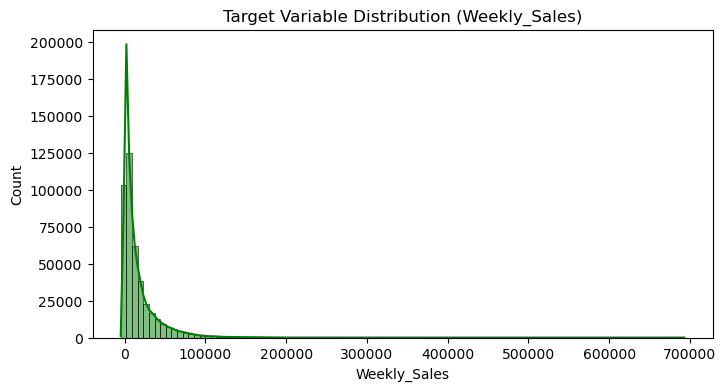

In [45]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.histplot(train_df['Weekly_Sales'], color='g',kde=True, bins=100)
plt.title('Target Variable Distribution (Weekly_Sales)')
plt.show()

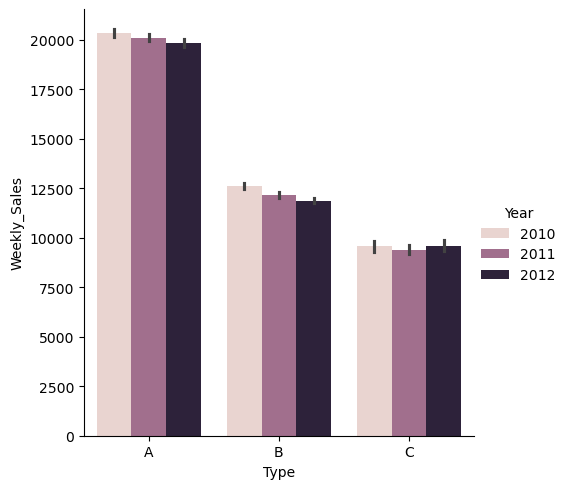

In [46]:
# Understanding 'Type' column for each year

sns.catplot(data=train_df, x="Type", y="Weekly_Sales", hue="Year", kind="bar")

<Figure size 1200x500 with 0 Axes>

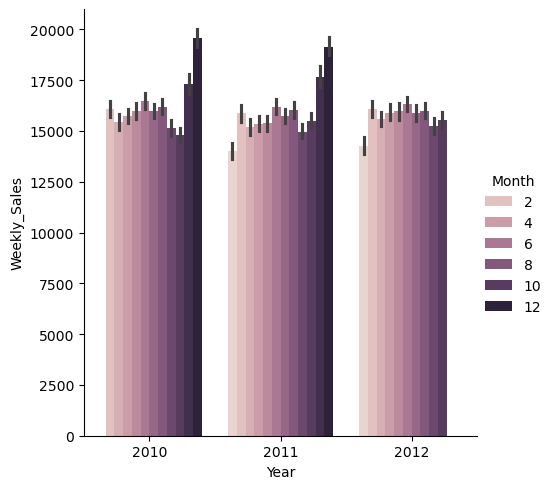

In [47]:
# Understanding month-wise sales for every year 

plt.figure(figsize=[12,5])
sns.catplot(data=train_df, x="Year", y="Weekly_Sales", hue="Month", kind="bar")
plt.show()

In [48]:
# Making categorical columns and numerical columns in separate lists

nf=[]
cf = ['Date', 'Store', 'Dept', 'IsHoliday', 'Type', 'Day', 'Month', 'Year']
for i in train_df.columns:
  if i not in cf:
    nf.append(i)
print(nf)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Week']


                                                Numeric Features Distribution                                                 


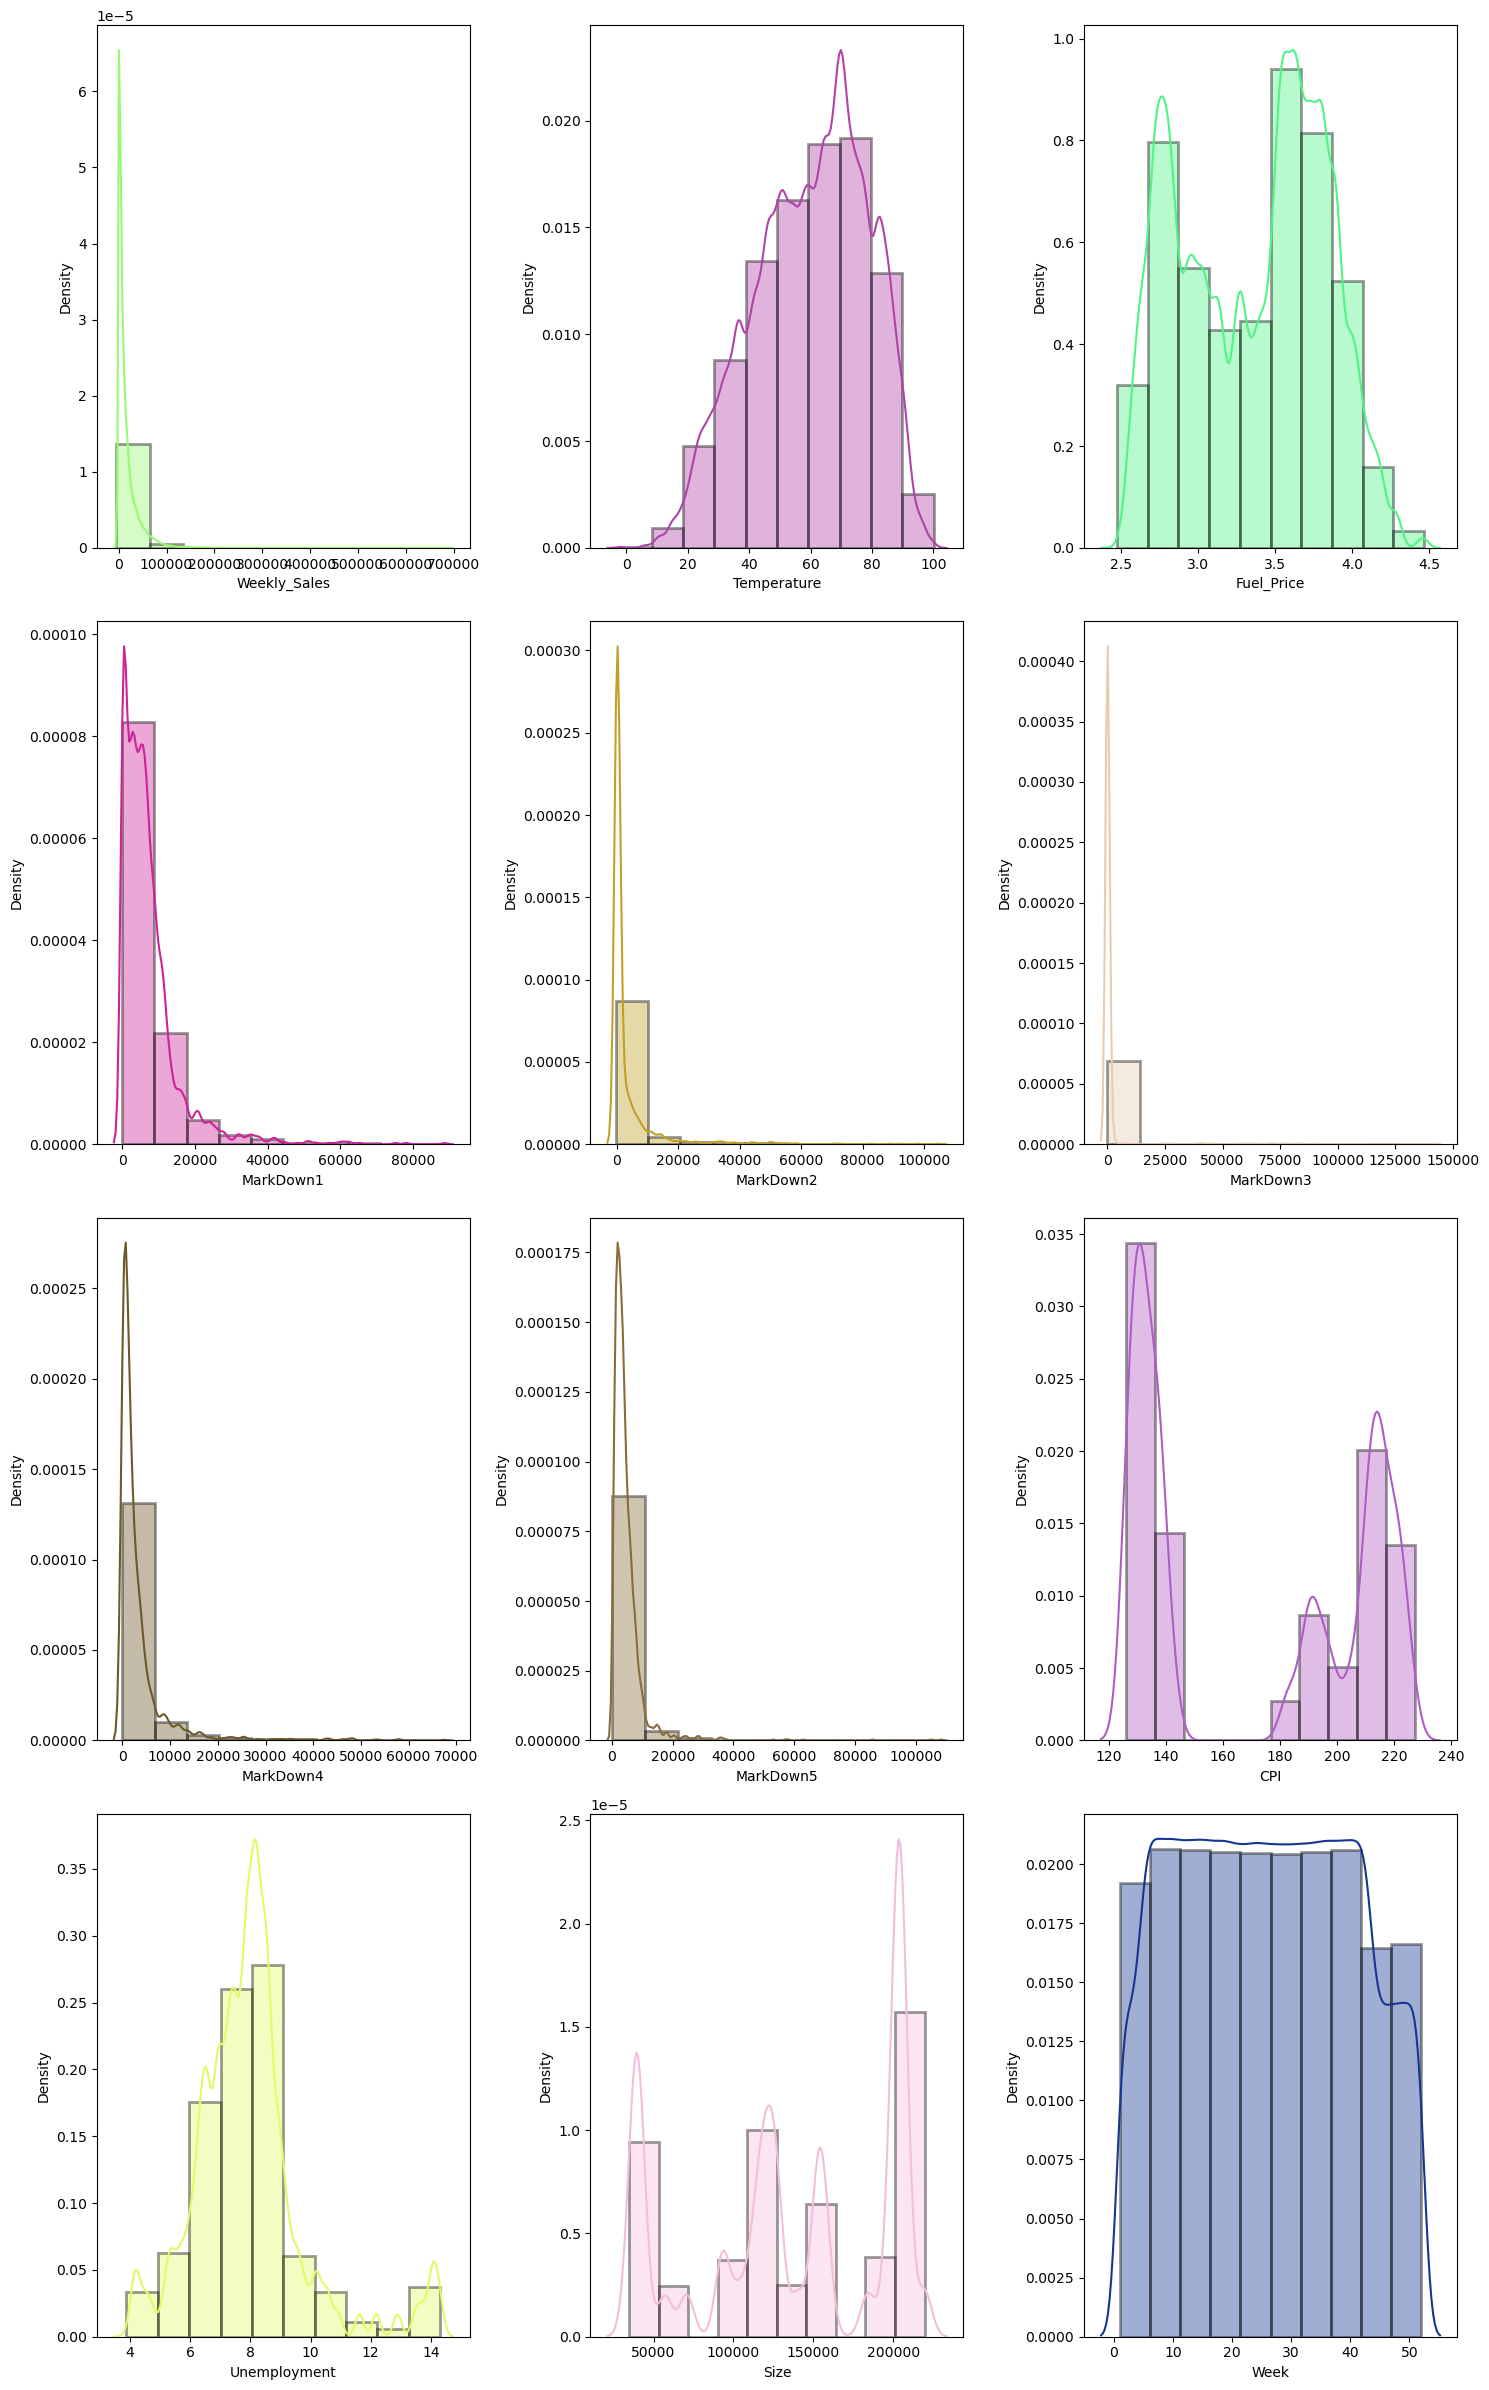

In [49]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(train_df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

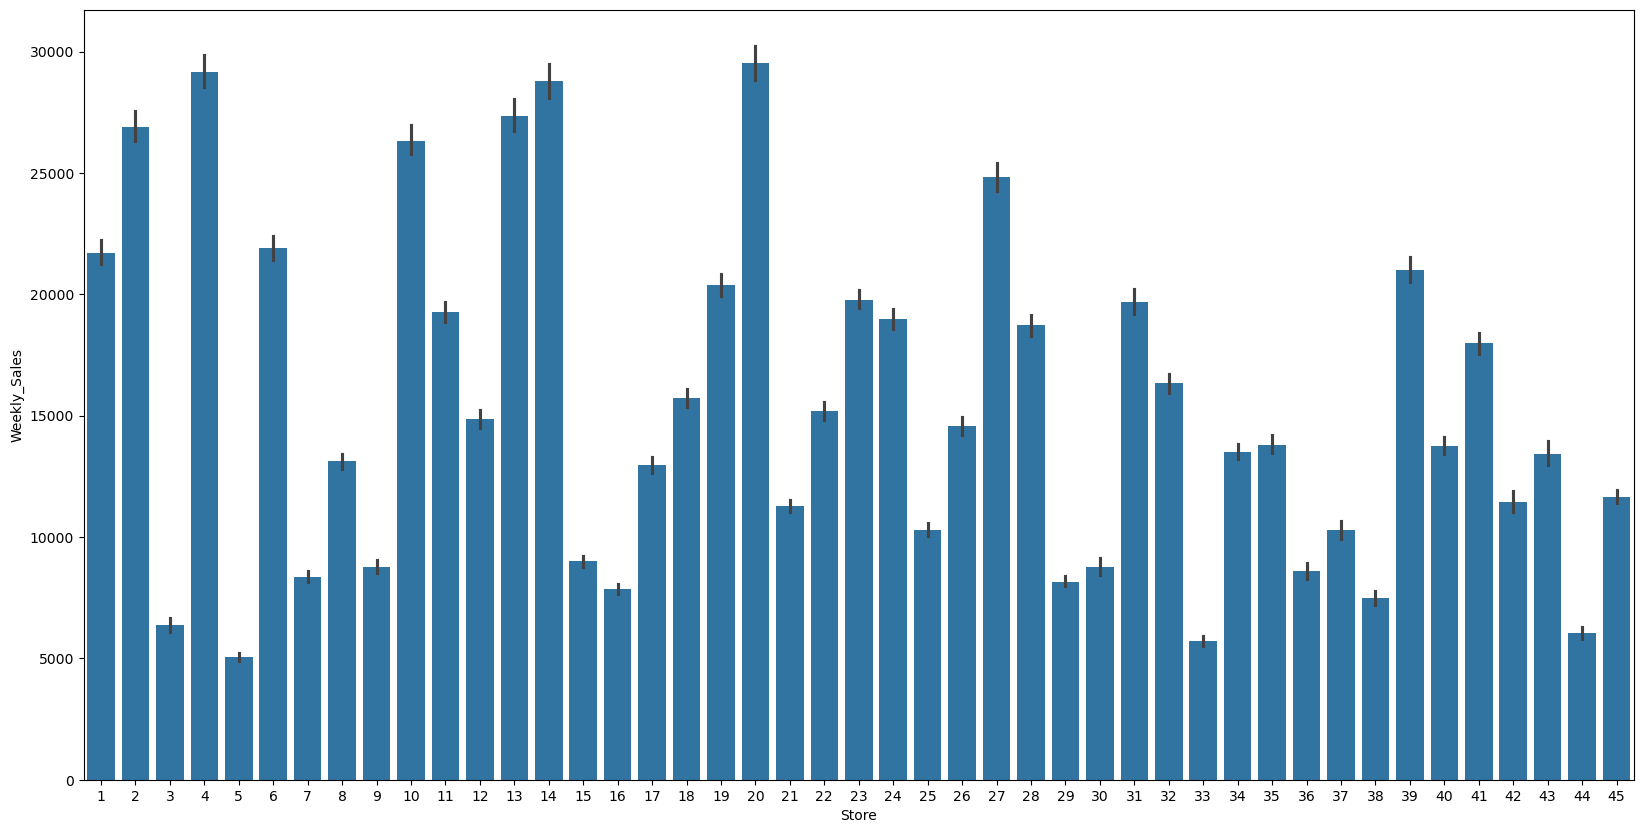

In [50]:
#Weekly sales by stores
plt.figure(figsize=(20,10))
sns.barplot(x=train_df.Store, y = train_df.Weekly_Sales)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

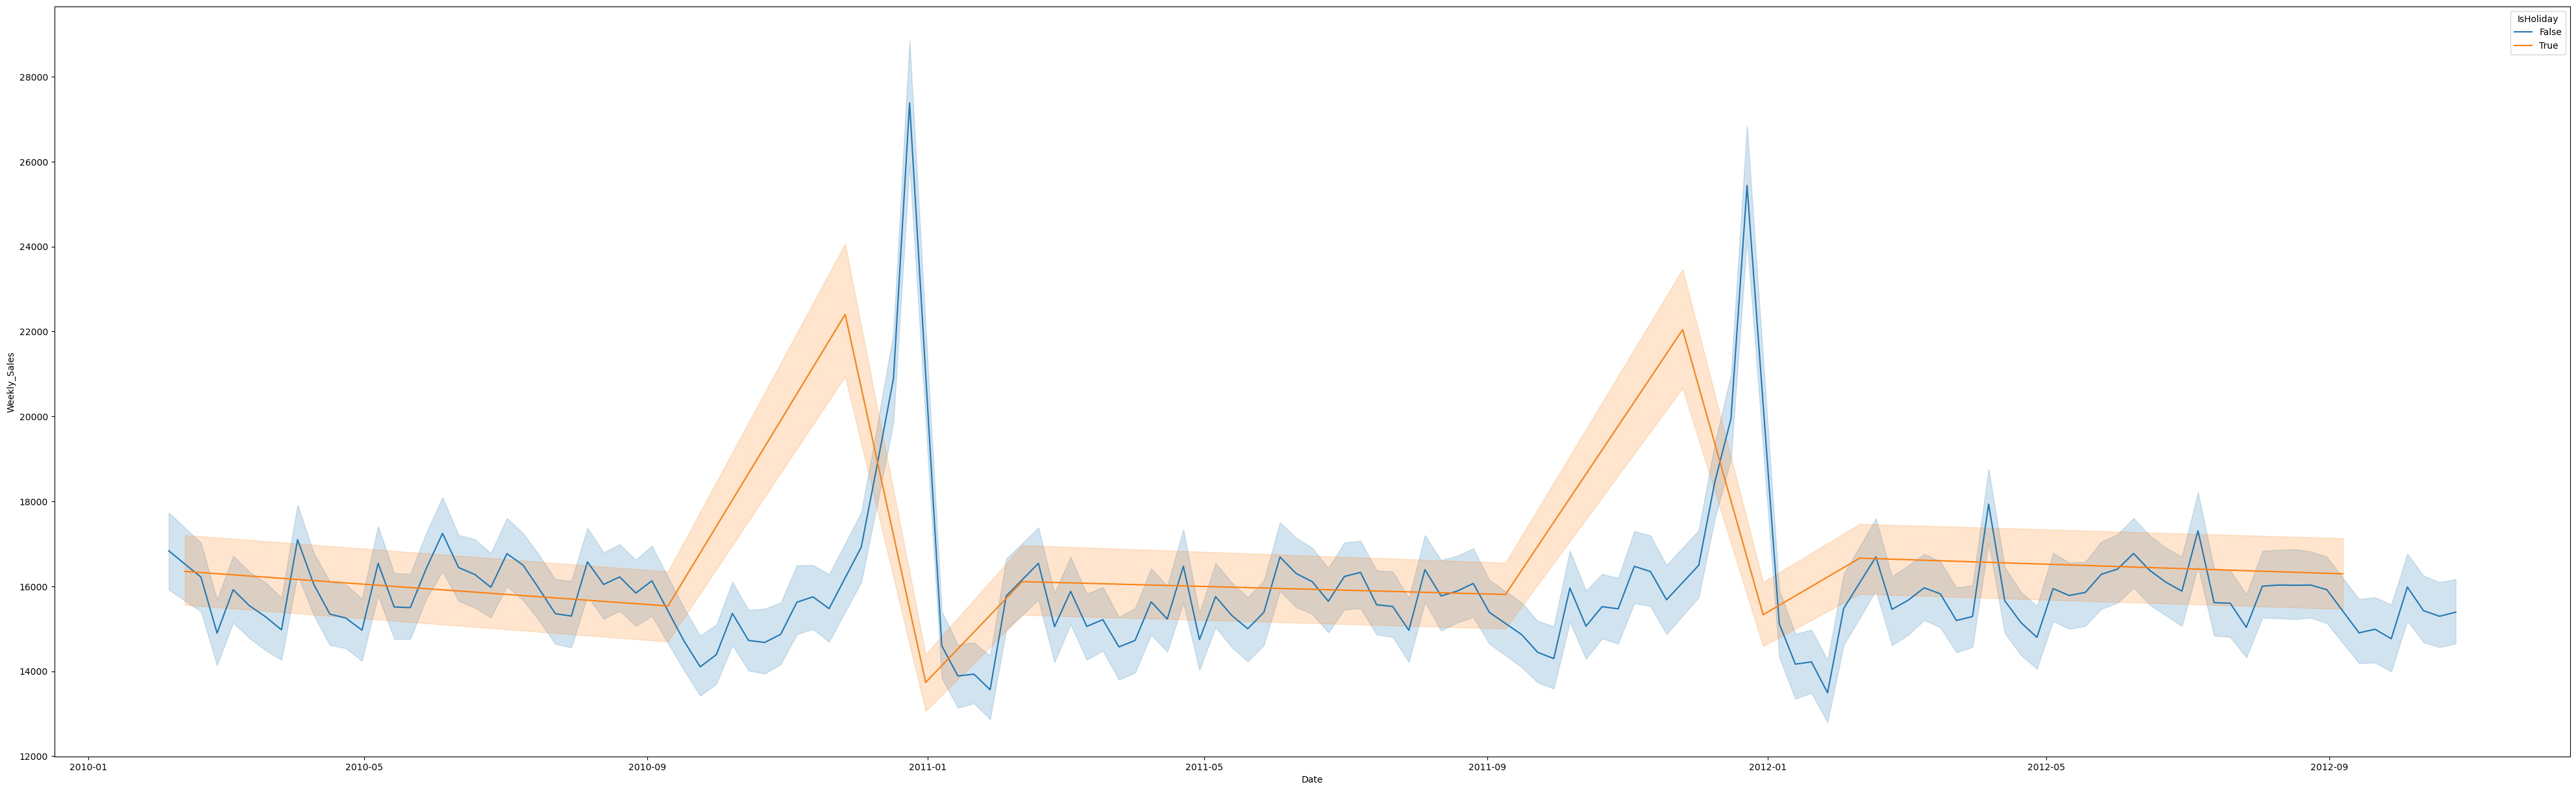

In [51]:
#The graph you provided shows weekly sales based on the date,
#with a distinction between holidays and non-holidays.
plt.figure(figsize=(50,15))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = train_df, hue='IsHoliday')

In [52]:
# Grouping Data by Year

growth = train_df.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'], growth['Month'] = growth['Date'].dt.year, growth['Date'].dt.month
growth

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,5,39,9,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,5,40,10,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,5,41,10,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,5,42,10,2012


In [53]:
#let's Group the data.

hypothesis = growth.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'IsHoliday']]
factors  = hypothesis.get_group(1)
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()

<AxesSubplot:>

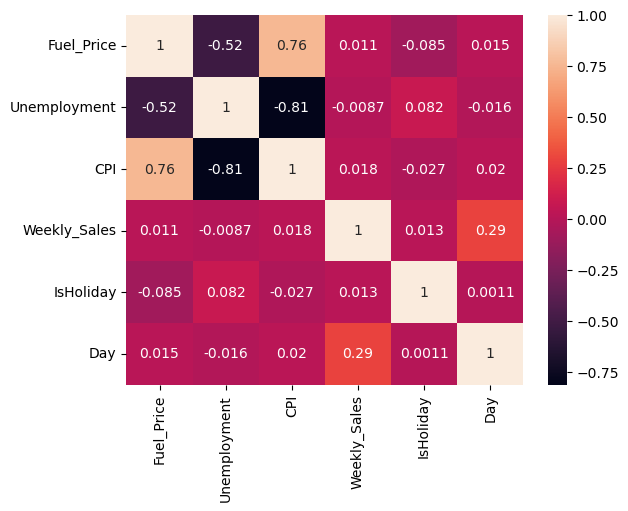

In [54]:
sns.heatmap(factors.corr(), annot = True)

In [55]:
factors

,Fuel_Price,Unemployment,CPI,Weekly_Sales,IsHoliday,Day
0,2.572,8.106,211.096358,24924.50,False,1
1,2.548,8.106,211.242170,46039.49,True,7
2,2.514,8.106,211.289143,41595.55,False,14
3,2.561,8.106,211.319643,19403.54,False,21
4,2.625,8.106,211.350143,21827.90,False,28
...,...,...,...,...,...,...
10239,3.638,6.908,222.305480,20.06,False,71673
10240,3.730,6.908,222.439015,0.05,True,71680
10241,3.717,6.908,222.582019,0.03,False,71687
10242,3.617,6.573,223.181477,635.00,False,71694


<h3>Hypothesis of CPI, FuelPrice, Unemployment with Weekly_Sales  </h3>

### Hypothesis Testing - CPI

0.0
reject null hypothesis


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

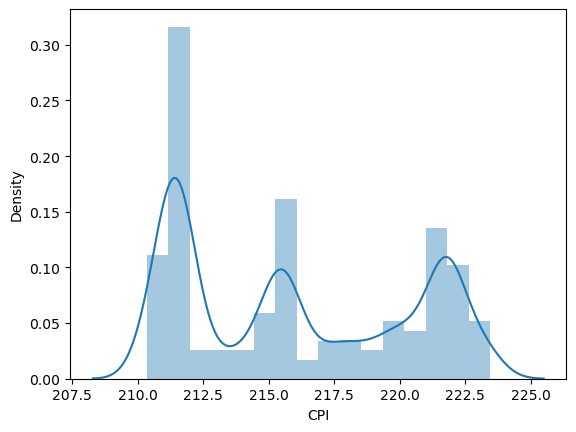

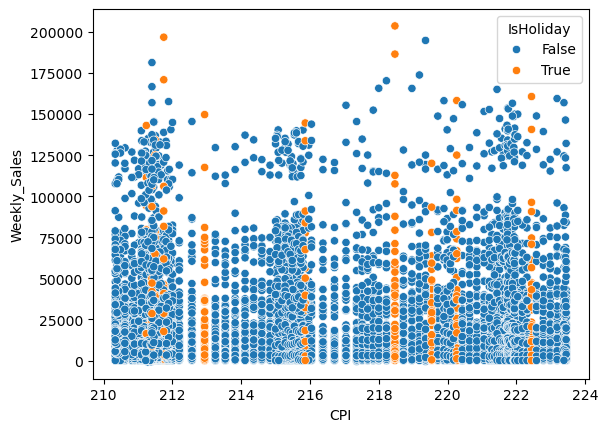

<Figure size 640x480 with 0 Axes>

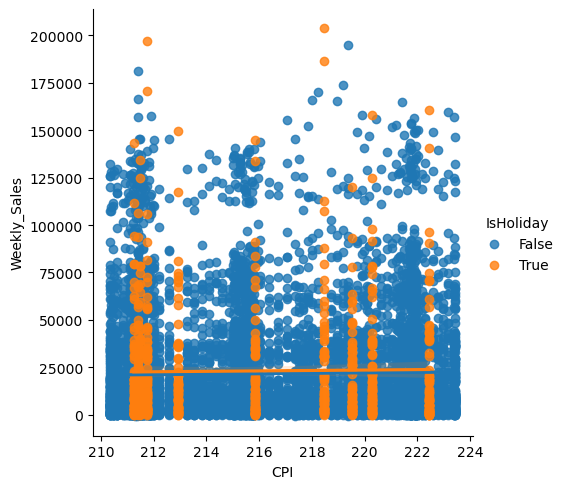

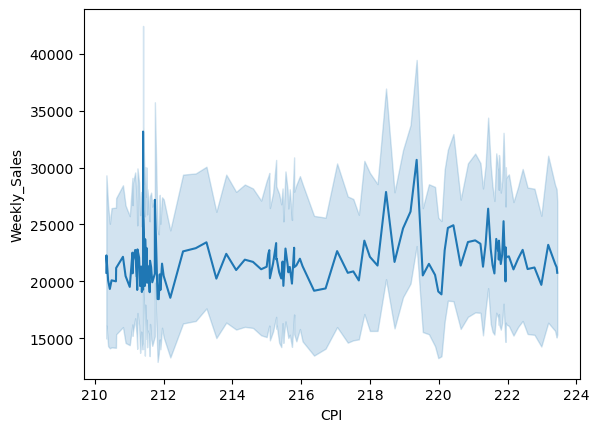

In [56]:
#The graph you provided shows weekly sales based on the date, 
#with a distinction between holidays and non-holidays. 
#This code analyzes and visualizes the relationship between weekly sales and the Consumer Price Index (CPI),
#taking into account whether the days are holidays or not
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

<p>

1. **Correlation between Weekly_Sales and CPI**:
   - The graphs show that Weekly_Sales and the Consumer Price Index (CPI) are correlated. This means that when the CPI increases, Weekly_Sales are likely to increase as well (and vice versa).
   - **Practical application**: If you're a retailer or store manager, you can use this information to predict how fluctuations in the CPI may impact your sales. For example, if the CPI increases due to inflation, you may need to adjust your marketing strategies or prices to maintain stable sales.

2. **Rejection of the null hypothesis**:
   - By rejecting the null hypothesis (that there is no relationship between Weekly_Sales and CPI), we assert that there is a significant relationship between these two variables.
   - **Practical application**: This allows you to make informed decisions. For instance, if you observe an increase in the CPI, you can anticipate a positive impact on sales and plan accordingly.

3. **Non-normal distribution of CPI**:
   - The histogram shows that CPI does not follow a normal (Gaussian) distribution. This can affect how we interpret statistical results.
   - **Practical application**: If you're using predictive models or regression analysis, consider that the non-normality of CPI may impact prediction accuracy. Explore transformation techniques or robust models.

4. **Linear regression plot**:
   - The plot illustrates how CPI varies with Weekly_Sales on holiday and non-holiday weeks.
   - **Practical application**: Use this plot to identify specific trends at different times (e.g., during holidays). A positive slope indicates that sales increase with higher CPI values.


</p>

### Hypothesis Testing - Fuel_Price

0.0
reject null hypothesis


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

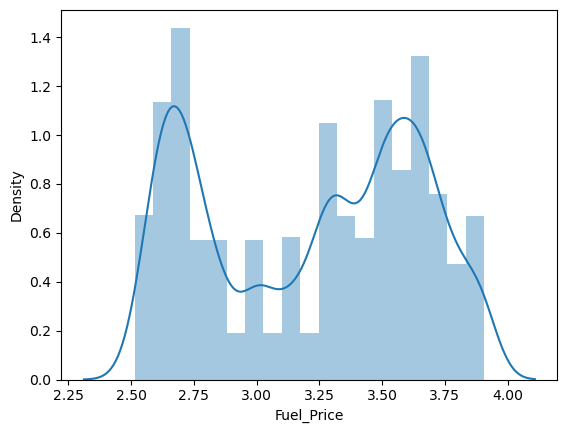

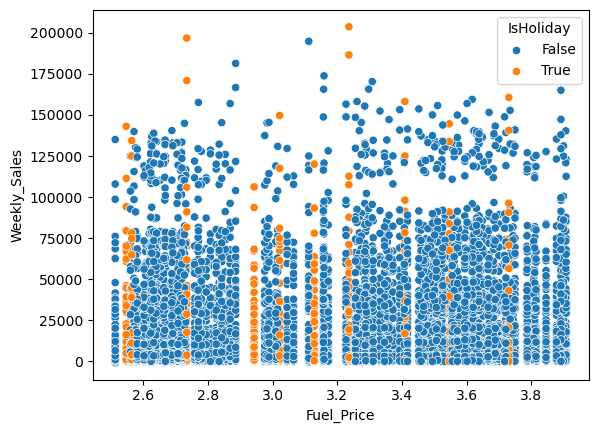

<Figure size 640x480 with 0 Axes>

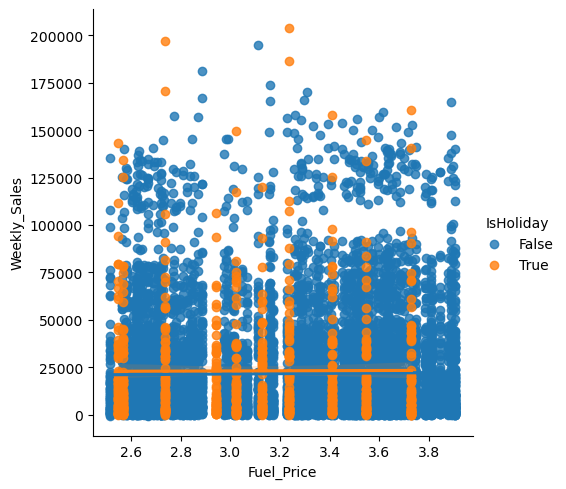

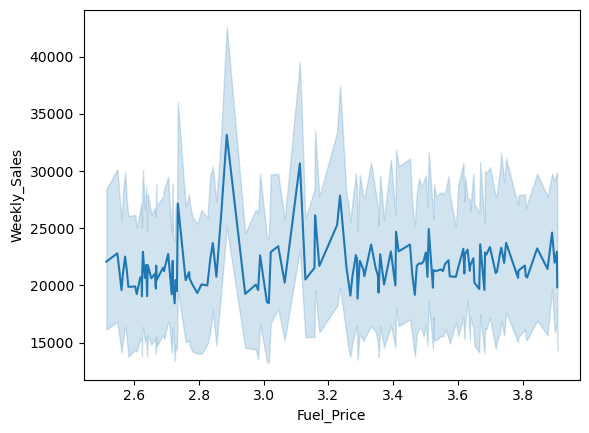

In [57]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

<p>

**Relationship Between Weekly Sales and Fuel Price**:
      There is a slight increase in Weekly Sales as the Fuel Price rises. This suggests a positive correlation between these two factors.
      The alternative hypothesis supports this idea, and the correlation chart also shows an upward trend.
      Why is this useful? If you’re a retailer or a business selling fuel-related products (such as gas stations), understanding this relationship can help you plan pricing strategies and promotions.

**Distribution of Fuel Price**:
        We observe that the distribution of Fuel Price has two peaks. This means there are two price values that are more common.
        Why is this useful? If you’re a consumer or a business dependent on fuel (such as vehicle fleets), knowing these peaks can help you make informed decisions about when to refuel or purchase.

**Sales During Holiday Weeks**:
        We noticed orange data points (sales) primarily during holiday weeks when fuel prices are relatively low.
        Why is this useful? If you’re a retailer, this could indicate opportunities for specific promotions during festivities. It could also help you anticipate demand during those times.

</p>

### Hypothesis Testing - Unemployment

0.0
reject null hypothesis


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

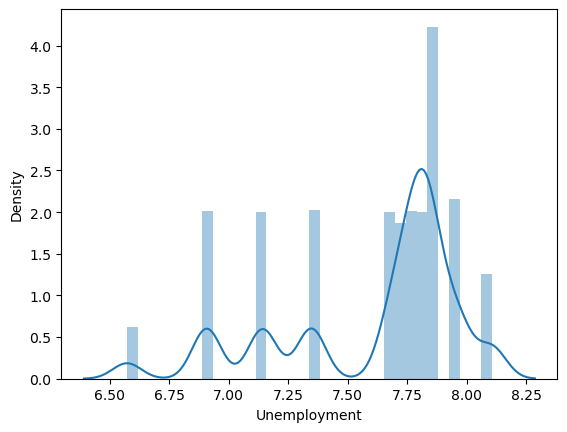

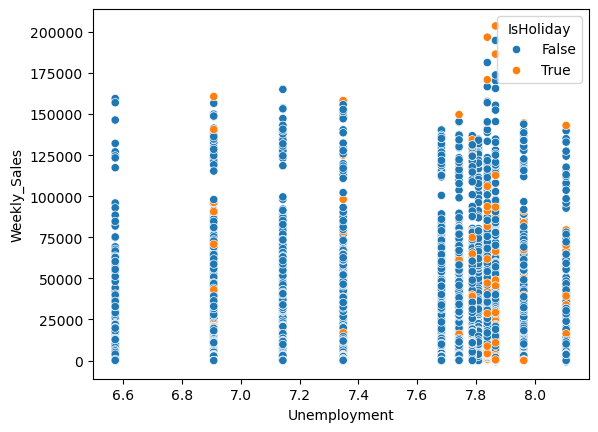

<Figure size 640x480 with 0 Axes>

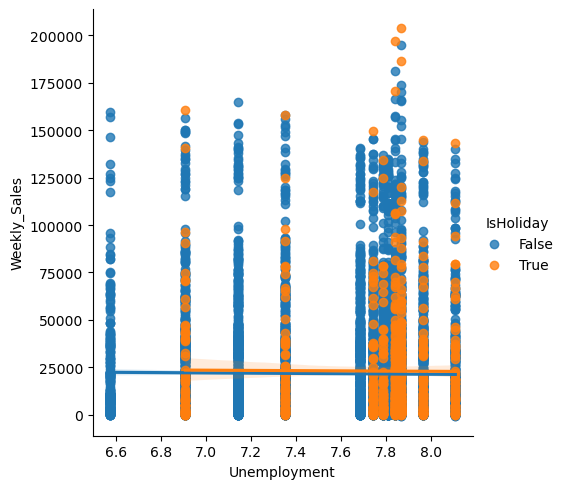

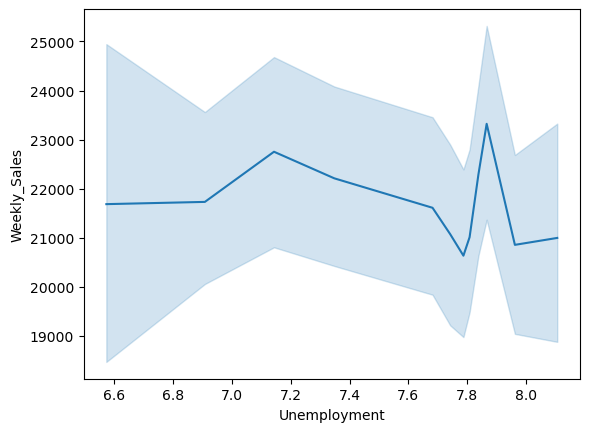

In [58]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

<p>
    
    
1. **Unemployment Rate Distribution:**
   - **Plot 1** displays the distribution of the unemployment rate. We observe that the mean falls between 7.5 and 8.0, indicating a relatively high level of unemployment.
   - Why is this relevant? A high unemployment rate can impact people's purchasing power and influence their buying decisions.

2. **Impact on Weekly Sales:**
   - **Plots 2 and 3** reveal how weekly sales are related to the unemployment rate.
   - During holiday seasons, sales increase, but there are only a few outliers during those times. This suggests that people primarily make purchases during festivities.
   - Why is this relevant? If you're a retailer, understanding these trends can help you plan specific marketing strategies for holiday seasons and anticipate demand.

3. **Rejecting the Null Hypothesis:**
   - The negative correlation between weekly sales and the unemployment rate is confirmed by rejecting the null hypothesis. The p-value (probability) is less than the significance level (alpha), supporting the alternative hypothesis.
   - Why is this relevant? This information can guide informed decisions regarding inventory, promotions, and sales schedules.

</p>

### Plotting Weekly_sales day wise for store 1, by keeping holidays as a parameter to get more insights

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

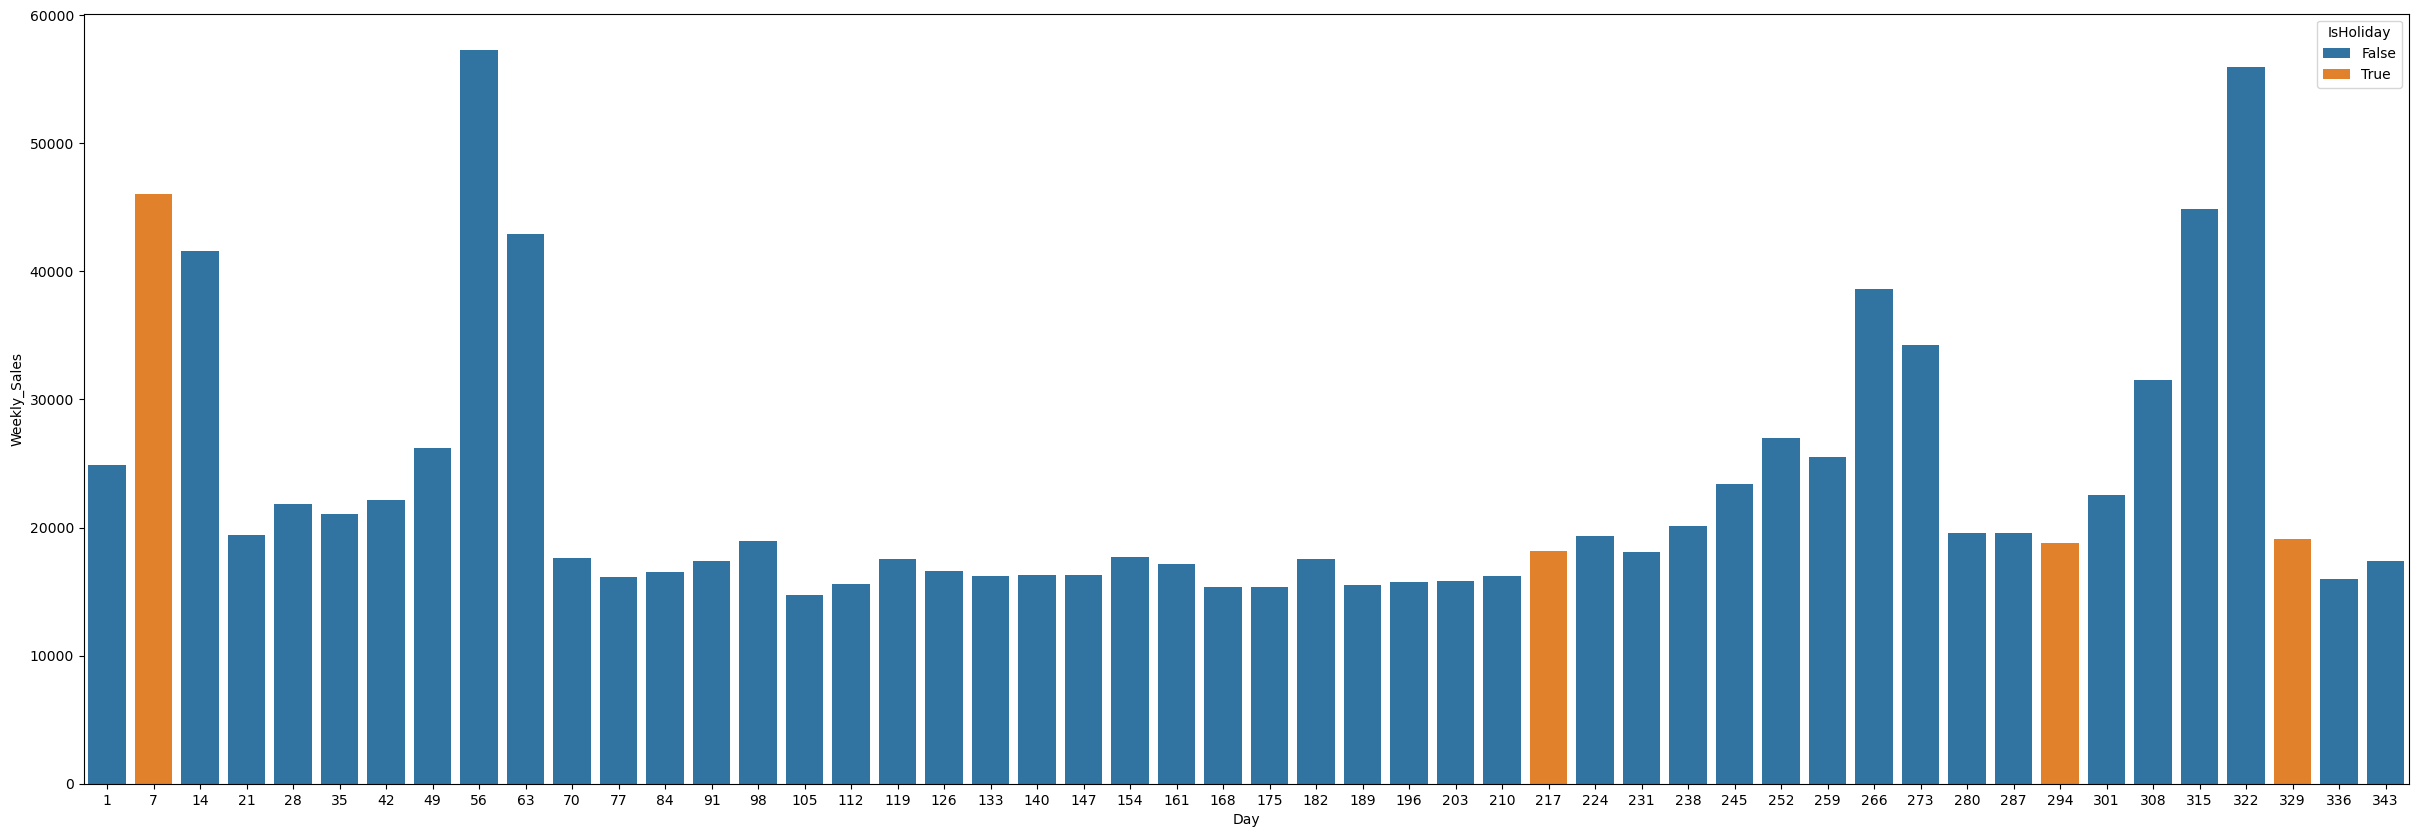

In [59]:
plt.figure(figsize=(30,10))
sns.barplot(x='Day', y = 'Weekly_Sales', data = factors.head(50), hue = 'IsHoliday')

# <center> Data Preprocessing 

In [60]:
test_df.isna().sum() #missing values

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [61]:
train_data = train_df.copy()
test_data  = test_df.copy()
train_data.fillna(0, inplace=True)

In [62]:
test_data.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [63]:
#handle missing values
test_data['CPI'].fillna(test_data['CPI'].mean(), inplace=True)
test_data['Unemployment'].fillna(test_data['Unemployment'].mean(), inplace=True)
test_data.fillna(0, inplace=True)

In [64]:
test_data.isna().sum() 

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
le                      = LabelEncoder()
train_data['IsHoliday'] = le.fit_transform(train_data['IsHoliday'])
test_data['IsHoliday']  = le.fit_transform(test_data['IsHoliday'])
train_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,5,9,3,2010


In [66]:
train_data['Type'] = le.fit_transform(train_data['Type'])
test_data['Type']  = le.fit_transform(test_data['Type'])

In [67]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,5,9,3,2010


# <center> Predictive Modelling

In [71]:
target_correlations = train_data.corr()['Weekly_Sales'].apply(abs).sort_values()

In [72]:
target_correlations

Fuel_Price      0.000120
Date            0.000663
Temperature     0.002312
Year            0.010111
IsHoliday       0.012774
MarkDown2       0.020716
CPI             0.020921
Unemployment    0.025864
Week            0.027673
Month           0.028409
MarkDown4       0.037467
MarkDown3       0.038562
MarkDown1       0.047172
MarkDown5       0.050465
Store           0.085195
Dept            0.148032
Type            0.182242
Size            0.243828
Weekly_Sales    1.000000
Day                  NaN
Name: Weekly_Sales, dtype: float64

In [73]:
features = ["Week", "CPI", "Unemployment", "Size", 'Type', 'Dept', 'Store']
train_data[features]
train_data["Week"] = train_data['Week'].astype(int)

In [80]:
from sklearn.model_selection import train_test_split
X = train_data[features].copy()
y = train_data['Weekly_Sales'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [81]:
from sklearn.preprocessing import StandardScaler 

scaler         = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)


rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

GradientBoostingRegressor()

In [116]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)

In [117]:
from sklearn import metrics

In [118]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)

In [119]:
print(score1, score2, score3)

0.0881412877064478 0.9743318270753671 0.7367296210268974


In [120]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR'],"R2_SCORE":[score1,score2,score3]})

In [121]:
final_data 

,Models,R2_SCORE
0,LR,0.088141
1,RF,0.974332
2,GBR,0.736730


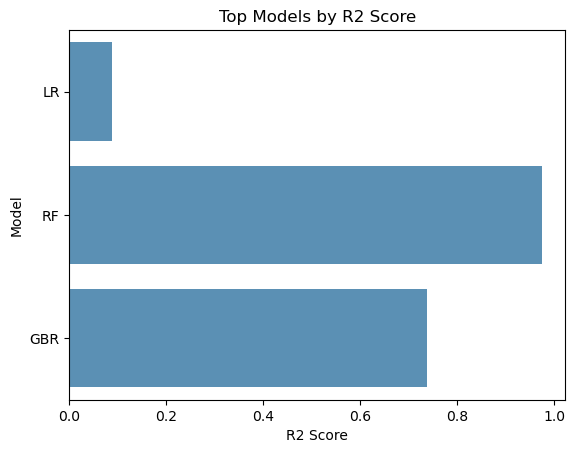

In [122]:
sns.barplot(x=final_data['R2_SCORE'], y=final_data['Models'], alpha=0.8)
plt.title('Top Models by R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()


<h3>Save Model</h3>

In [ ]:
rf = RandomForestRegressor()
rf_final = rf.fit(X,y)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_final, 'sales_predictions')

# <center> Project Outcomes & Insights

<p>

* **Impact of Unemployment Rate on Weekly Sales:**
  - When the unemployment rate increases, people tend to buy only during holiday seasons. This is reflected in the outliers present in weekly sales, which mainly occur on holidays. During these moments, people purchase necessary products and try to save more.
  - To mitigate this impact, it is advisable to hire more temporary staff in November and December when sales are higher. Additionally, permanent staff can be encouraged to take vacations in January when sales decrease.

* **Sales Pattern Analysis:**
  - Predicted sales data can be useful for analyzing sales patterns and adjusting staffing in the store according to demand.
  - We observe that sales increase slightly when the temperature is lower. This suggests that people prefer to shop in cooler weather unless it's a holiday week.

* **Correlations and Store Performance:**
  - The Consumer Price Index (CPI) and fuel prices are positively correlated with weekly sales, while the unemployment rate is negatively correlated.
  - Historically, the top-performing stores are numbers 20, 4, 14, 13, and 2, whereas the worst-performing stores are numbers 33, 5, 36, 38, and 3.

* **Losses and Holiday Purchases:**
  - During holiday seasons like Christmas and the Super Bowl, people tend to buy more expensive products, leading to increased weekly sales.
  - Store 20 performs well in terms of weekly sales, being the only store with maximum sales.

</p>